In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime as datetime

In [50]:
import os

### Reading the Dataset provided. 

In [ ]:
df = pd.read_csv("Data Set 2.csv")

### Sorting the database according to the various 'channels' provided and passing the database to the cohort function.

C:\Users\Sarthak Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sarthak Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Sarthak Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

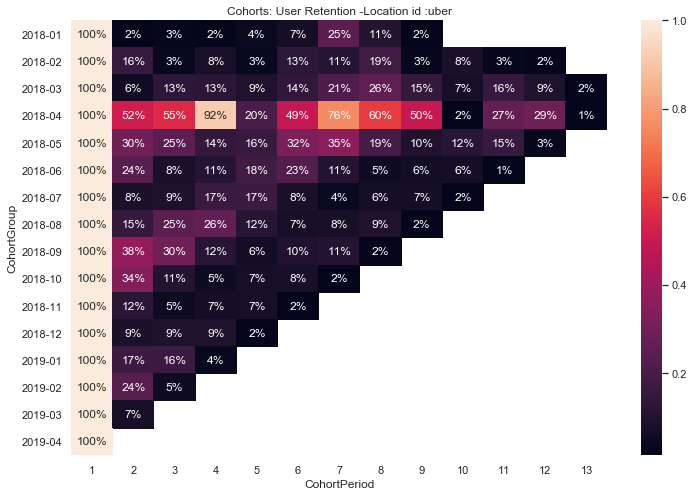

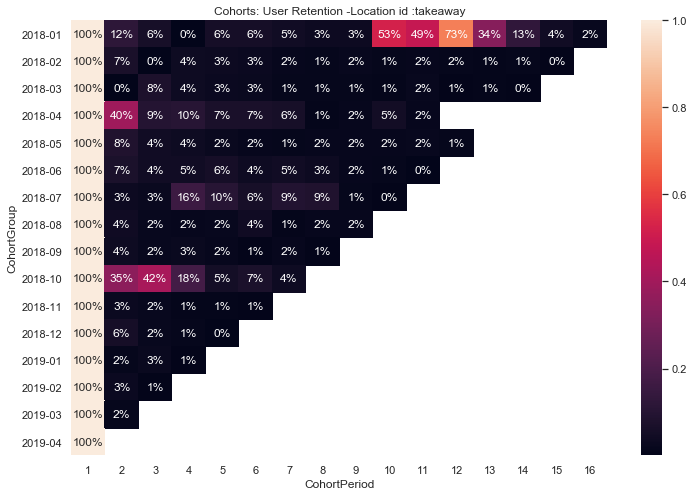

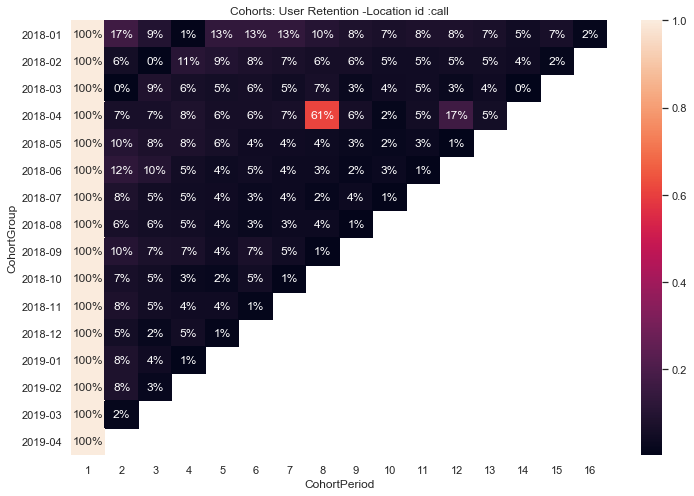

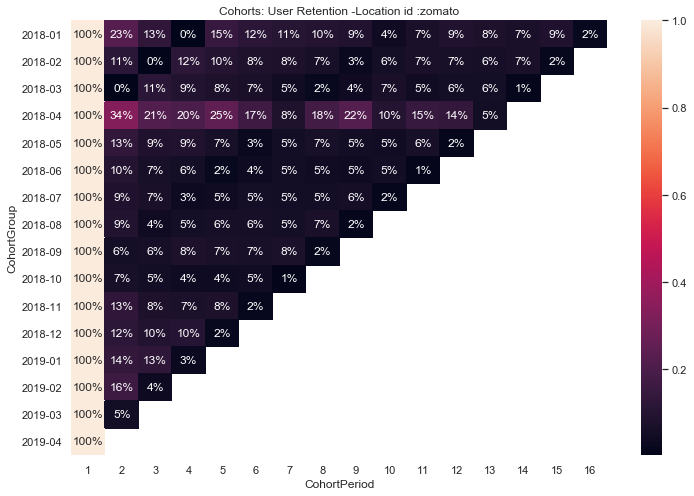

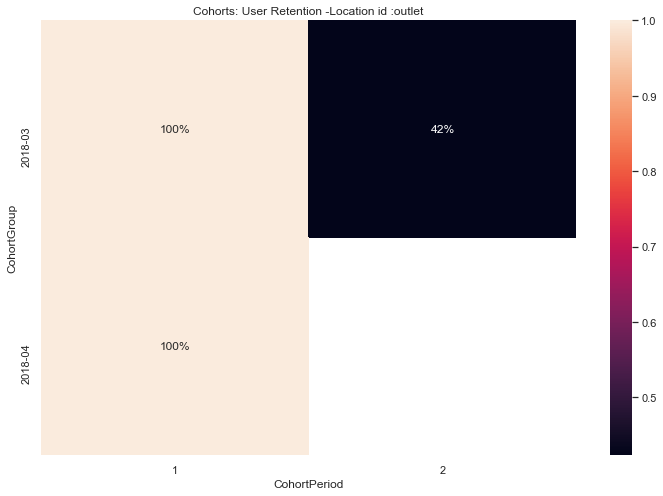

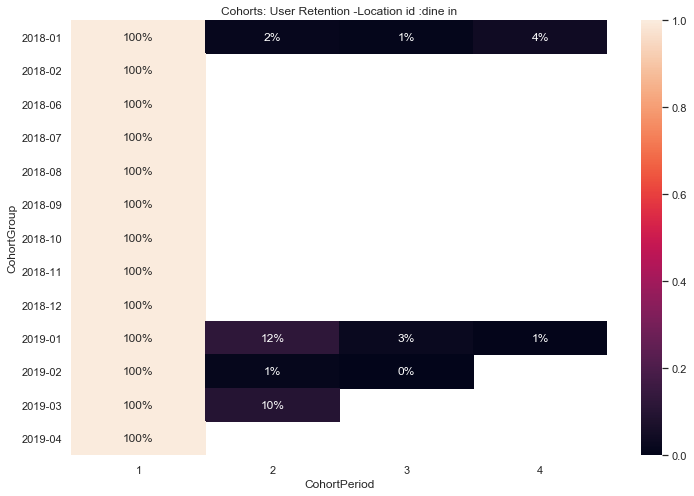

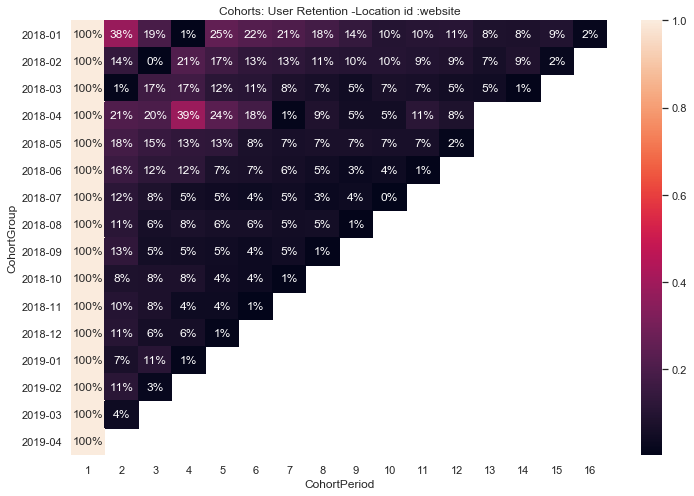

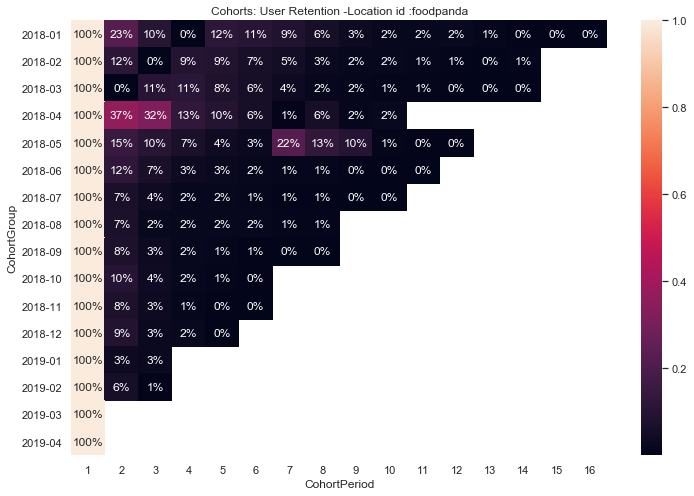

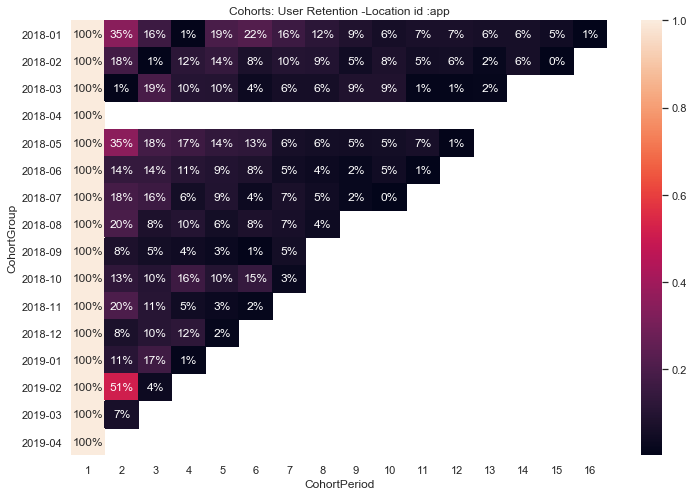

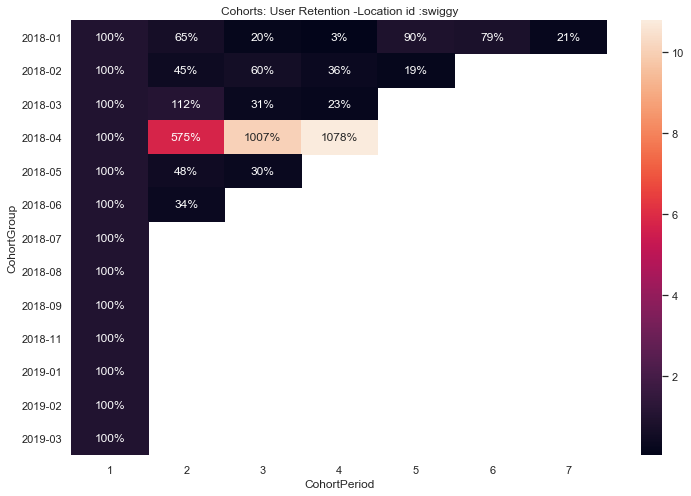

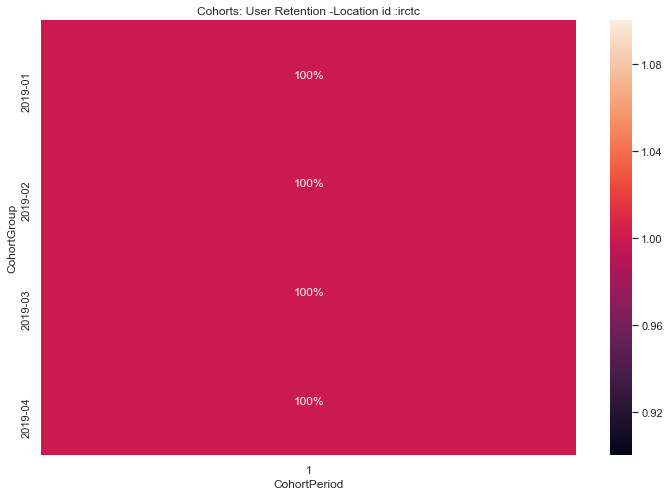

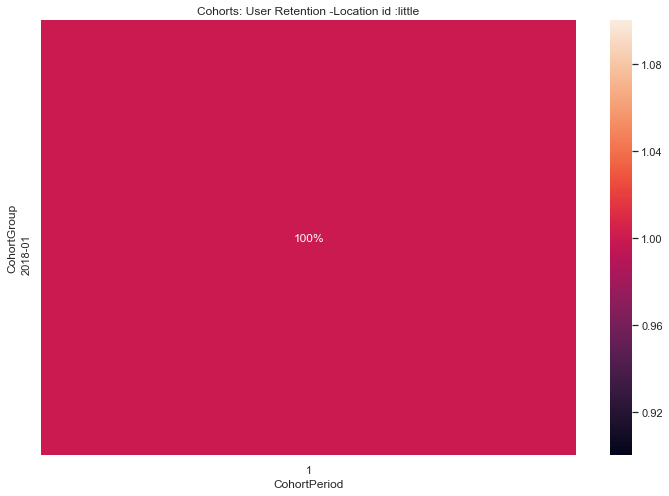

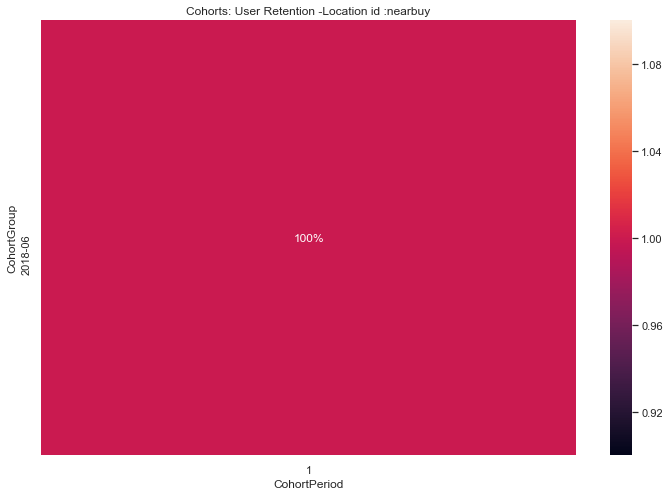

In [49]:
array=df['channel'].unique()
for i in array:
    func(df[df['channel']==i],i) 

### Creating the 'Cohort Period' according to the the dataset for various channels.

In [ ]:
def func(df, _id):
    df['created_on'] = df.created_on.apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))

    df.head()

    df.set_index('customer_id', inplace=True)
    df['CohortGroup'] = df.groupby(level=0)['created_on'].min().apply(lambda x: x.strftime('%Y-%m'))
    df.reset_index(inplace=True)
    df.head()

    df['created_on'] = df.created_on.apply(lambda x: x.strftime('%Y-%m'))

    df.head()

    grouped = df.groupby(['CohortGroup', 'created_on'])

    # count the unique users, orders, and total revenue per Group + Period
    cohorts = grouped.agg({'customer_id': pd.Series.nunique,
                           'amount': np.sum})

    # make the column names more meaningful
    cohorts.rename(columns={'customer_id': 'TotalUsers',
                            'amount': 'TotalOrders'}, inplace=True)
    cohorts.head()

    def cohort_period(df):
        """
        Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.

        Example
        -------
        Say you want to get the 3rd month for every user:
            df.sort(['UserId', 'OrderTime', inplace=True)
            df = df.groupby('UserId').apply(cohort_period)
            df[df.CohortPeriod == 3]
        """
        df['CohortPeriod'] = np.arange(len(df)) + 1
        return df

    cohorts = cohorts.groupby(level=0).apply(cohort_period)
    cohorts.head()

    cohorts.reset_index(inplace=True)
    cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True, )

    # create a Series holding the total size of each CohortGroup
    cohort_group_size = cohorts['TotalOrders'].groupby(level=0).first()
    cohort_group_size.head()
    # cohorts

    cohorts['TotalUsers'].head()

    cohorts['TotalOrders'].unstack(0).head()


    user_retention = cohorts['TotalOrders'].unstack(0).divide(cohort_group_size, axis=1)
    user_retention.head(10)

    import seaborn as sns
    sns.set(style='white')

    plt.figure(figsize=(12, 8))
    plt.title('Cohorts: User Retention -Channel id :'+ str(_id))
    sns_plot=sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');
    figure=sns_plot.get_figure()
   
    fig_name= "channel_"+str(_id)+"png"
    figure.savefig( fig_name, dpi=400)